In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 14.1 MB/s eta 0:00:00


In [ ]:
import numpy as np

def traffic_density(traffic_data, area_size):
    # Initialize a 2D array to store the traffic density
    density = np.zeros((area_size, area_size))

    # Iterate over the traffic data
    for i in range(len(traffic_data)):
        # Calculate the traffic density for each cell
        density[int(traffic_data[i][0]), int(traffic_data[i][1])] += 1

    # Normalize the traffic density by the area size
    density /= area_size ** 2

    return density

# Example usage
traffic_data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
area_size = 10
density = traffic_density(traffic_data, area_size)
print(density)

[[          0           0           0           0           0           0           0           0           0           0]
 [          0           0        0.01           0           0           0           0           0           0           0]
 [          0           0           0           0           0           0           0           0           0           0]
 [          0           0           0           0        0.01           0           0           0           0           0]
 [          0           0           0           0           0           0           0           0           0           0]
 [          0           0           0           0           0           0        0.01           0           0           0]
 [          0           0           0           0           0           0           0           0           0           0]
 [          0           0           0           0           0           0           0           0        0.01           0]
 [          0   

In [ ]:
  # Function to find nth fibonacci number
  def fib(n):
      if (n <= 1):
          return n
      x = fib(n - 1)
      y = fib(n - 2)

      return x + y

  n = 5;

  # Function Call
  print(fib(n))

5


In [ ]:
# Python program to Returns the number of arrangements to form 'n'
def solve(n):
  # Base case
    if(n < 0):
        return 0
    if(n == 0):
        return 1
    return solve(n-1)+solve(n-3)+solve(n-5)

In [ ]:
# Initialize to -1
dp = []

# This function returns the number of
# arrangements to form 'n'
def solve(n):
    # base case
    if n < 0:
        return 0
    if n == 0:
        return 1

# Checking if already calculated
    if dp[n] != -1:
        return dp[n]

# Storing the result and returning
    dp[n] = solve(n-1) + solve(n-3) + solve(n-5)
    return dp[n]

In [ ]:
!pip install opencv-python
!pip install ultralytics

import cv2
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8s.pt')

# Open the video file
cap = cv2.VideoCapture('traffic_video.mp4')  # Replace with your video file

# Define the region of interest (ROI) - adjust coordinates as needed
roi_vertices = np.array([[(100, 100), (500, 100), (500, 400), (100, 400)]], dtype=np.int32)

while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break

    # Detect vehicles in the frame
    results = model(frame)

    # Count vehicles within the ROI
    vehicle_count = 0
    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            cx, cy = (x1 + x2) / 2, (y1 + y2) / 2
            if cv2.pointPolygonTest(roi_vertices, (cx, cy), False) >= 0:
                vehicle_count += 1

    # Draw the ROI
    cv2.polylines(frame, roi_vertices, isClosed=True, color=(0, 255, 0), thickness=2)

    # Display vehicle count and density on the frame
    cv2.putText(frame, f'Vehicles: {vehicle_count}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Calculate and display density - adjust area as needed
    area = 400 * 400 # example area of the ROI
    density = vehicle_count / area if area > 0 else 0
    cv2.putText(frame, f'Density: {density:.2f}', (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imshow('Traffic Density', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

100%|██████████| 21.5M/21.5M [00:00<00:00, 49.0MB/s]


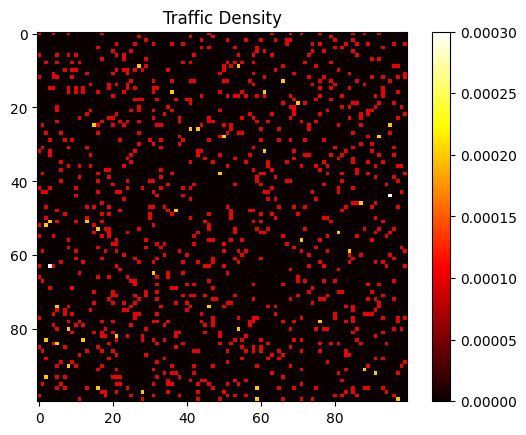

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

class TrafficDensityEstimator:
    def __init__(self, area_size, num_vehicles):
        self.area_size = area_size
        self.num_vehicles = num_vehicles
        self.traffic_data = self.generate_traffic_data()
        self.density = np.zeros((area_size, area_size))

    def generate_traffic_data(self):
        # Generate random traffic data
        traffic_data = np.zeros((self.num_vehicles, 2))
        for i in range(self.num_vehicles):
            traffic_data[i, 0] = random.randint(0, self.area_size - 1)
            traffic_data[i, 1] = random.randint(0, self.area_size - 1)
        return traffic_data

    def estimate_traffic_density(self):
        # Estimate traffic density using dynamic programming
        for i in range(self.num_vehicles):
            # Ensure x and y are integers
            x, y = int(self.traffic_data[i, 0]), int(self.traffic_data[i, 1])
            self.density[x, y] += 1

        # Normalize the traffic density by the area size
        #to indicate the dataa by traffic arear using red and yellow

        self.density /= self.area_size ** 2

    def visualize_traffic_density(self):
        # Visualize the traffic density using a heatmap
        plt.imshow(self.density, cmap='hot', interpolation='nearest')
        plt.title('Traffic Density')
        plt.colorbar()
        plt.show()

# Example usage
area_size = 100
num_vehicles = 1000
estimator = TrafficDensityEstimator(area_size, num_vehicles)
estimator.estimate_traffic_density()
estimator.visualize_traffic_density()

In [ ]:
import cv2
import numpy as np

# Load the image using the full path you found
image = cv2.imread("/home/user/Pictures/io.png")  # Replace with the actual full path

if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # (Rest of your code to process the image)
    # Convert the image to grayscale for easier processing
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Analyze and process contours
    for contour in contours:
        # Approximate the contour shape
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx_contour = cv2.approxPolyDP(contour, epsilon, True)

        # Check the number of sides in the approximated contour
        if len(approx_contour) == 3:
            # It's a triangle
            print("Triangle detected")
        elif len(approx_contour) == 4:
            # It's a quadrilateral
            print("Quadrilateral detected")
        else:
            # It's a different shape
            print("Other shape detected")

        # Draw the contour on the original image
        cv2.drawContours(image, [approx_contour], -1, (0, 255, 0), 2)

    # Display the original image with contours
    cv2.imshow("Image with Contours", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Error: Could not load image. Please check the file path.


In [ ]:
#shortest path in the traffic
import networkx as nx

class Node:
    def __init__(self, location, traffic_density, is_shore=False):
        self.location = location
        self.traffic_density = traffic_density
        self.is_shore = is_shore

class Edge:
    def __init__(self, start_node, end_node, distance, speed_limit):
        self.start_node = start_node
        self.end_node = end_node
        self.distance = distance
        self.speed_limit = speed_limit

def create_graph(nodes, edges):
    G = nx.Graph()
    for node in nodes:
        G.add_node(node.location, traffic_density=node.traffic_density, is_shore=node.is_shore)
    for edge in edges:
        G.add_edge(edge.start_node.location, edge.end_node.location, weight=edge.distance)
    return G

def find_shore(graph, start_node):
    path = nx.dijkstra_path(graph, start_node, target=None, weight='weight')
    for node in path:
        if graph.nodes[node]['is_shore']:
            return node
    return None

# Example usage:
nodes = [
    Node("A", 100, False),
    Node("B", 5, False),
    Node("C", 8, False),
    Node("D", 12, True),
    Node("E", 7, False)
]

edges = [
    Edge(nodes[0], nodes[1], 3, 40),
    Edge(nodes[1], nodes[2], 2, 50),
    Edge(nodes[2], nodes[3], 4, 30),
    Edge(nodes[3], nodes[4], 5, 25)
]

graph = create_graph(nodes, edges)
start_node = "A"
shore_node = find_shore(graph, start_node)

if shore_node:
    print("Shore found:", shore_node)
else:
    print("No shore found")

Shore found: D


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

# Assuming all the CSV files are in the same directory as the script
# If not, replace with the actual path to the directory containing the files
data_directory = '/path/to/your/directory'  # Replace with the actual path

# List of file names
file_names = [
    'location_data.csv',
    'traffic_volume.csv',
    'vehicle_classification.csv',
    'travel_time_delay.csv',
    'speed_data.csv',
    'incident_data.csv',
    'parking_availability.csv',
    'geometric_control.csv',
    'floating_car_data.csv'
]

# Create a dictionary to store the dataframes
dataframes = {}

# Load each CSV file into a dataframe and store it in the dictionary
for file_name in file_names:
    file_path = os.path.join(data_directory, file_name)
    if os.path.exists(file_path):
        try:
            dataframes[file_name.replace('.csv', '')] = pd.read_csv(file_path)
        except Exception as e:
            print(f"Error reading {file_name}: {e}")
    else:
        print(f"Error: Could not find {file_name}")

# Access the dataframes using the keys in the dictionary
location_data = dataframes.get('location_data')
traffic_volume = dataframes.get('traffic_volume')
# ... and so on for the other dataframes

# ... (Rest of your code to analyze and visualize the data)


sns.set(style="whitegrid")

# Function to visualize locations on a map
def visualize_locations(location_data):
    plt.figure(figsize=(12, 8))
    plt.scatter(location_data['Longitude'], location_data['Latitude'], alpha=0.7, color='blue', s=100)
    for i in range(len(location_data)):
        plt.annotate(
            location_data['Location_Name'][i],
            (location_data['Longitude'][i], location_data['Latitude'][i]),
            fontsize=9,
            ha='right'
        )
    plt.title('Location Distribution of Traffic Management System', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.grid(True)
    plt.show()

# Function to analyze traffic volume with enhanced features
def analyze_traffic_volume(traffic_volume):
    print("Traffic Volume Analysis:\n")
    print(traffic_volume.describe())

    plt.figure(figsize=(14, 7))
    sns.lineplot(data=traffic_volume, x='Time', y='Vehicle_Count', marker='o', ci=None)
    plt.title('Total Vehicle Count by Time', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Total Vehicle Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Function to visualize vehicle classification
def visualize_vehicle_classification(vehicle_classification):
    print("Vehicle Classification Analysis:\n")

    vehicle_classification_sum = vehicle_classification.groupby('Location').sum().reset_index()
    vehicle_classification_sum.set_index('Location', inplace=True)

    plt.figure(figsize=(14, 8))
    vehicle_classification_sum.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Vehicle Classification by Location', fontsize=16)
    plt.xlabel('Location', fontsize=12)
    plt.ylabel('Vehicle Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Vehicle Type', loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()


Error: Could not find location_data.csv
Error: Could not find traffic_volume.csv
Error: Could not find vehicle_classification.csv
Error: Could not find travel_time_delay.csv
Error: Could not find speed_data.csv
Error: Could not find incident_data.csv
Error: Could not find parking_availability.csv
Error: Could not find geometric_control.csv
Error: Could not find floating_car_data.csv


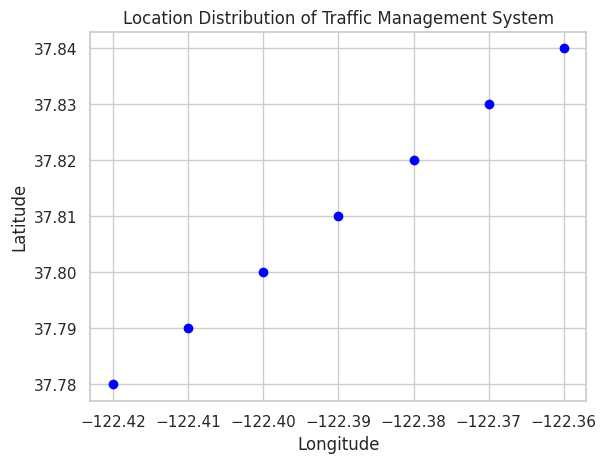

In [ ]:
import matplotlib.pyplot as plt

# Data for locations
locations = [
    (-122.36, 37.84),
    (-122.37, 37.83),
    (-122.38, 37.82),
    (-122.39, 37.81),
    (-122.40, 37.80),
    (-122.41, 37.79),
    (-122.42, 37.78)
]

# Extract latitude and longitude coordinates
longitudes = [location[0] for location in locations]
latitudes = [location[1] for location in locations]

# Create scatter plot
plt.scatter(longitudes, latitudes, color='blue', label='Locations')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location Distribution of Traffic Management System')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()

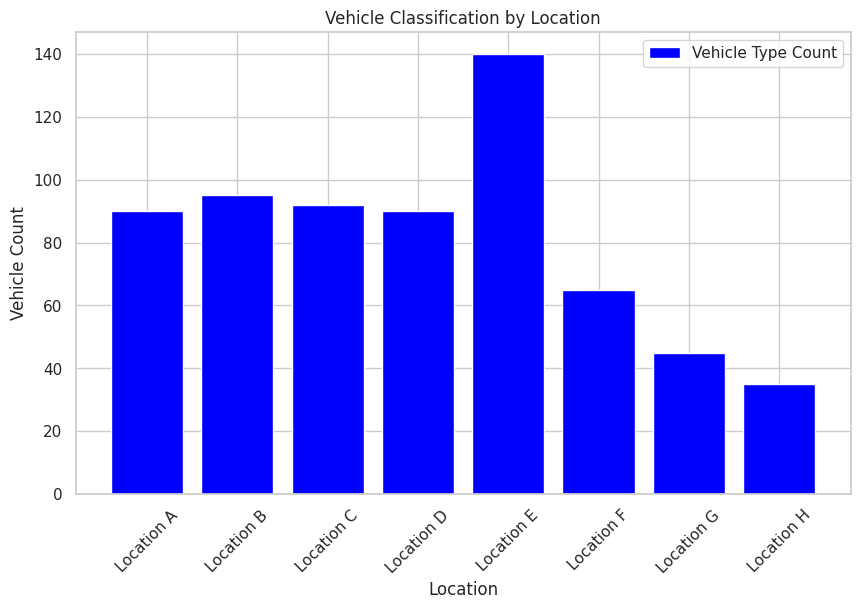

In [ ]:
import matplotlib.pyplot as plt

# Data for vehicle count at different locations
vehicle_count_data = {
    "Location A": 10,
    "Location B": 95,
    "Location C": 92,
    "Location D": 90,
    "Location E": 140,
    "Location F": 65,
    "Location G": 45,
    "Location H": 35
}

# Convert data to lists for plotting
locations = list(vehicle_count_data.keys())
counts = list(vehicle_count_data.values())

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(locations, counts, color='blue', label='Vehicle Type Count')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Vehicle Count')
plt.title('Vehicle Classification by Location')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()

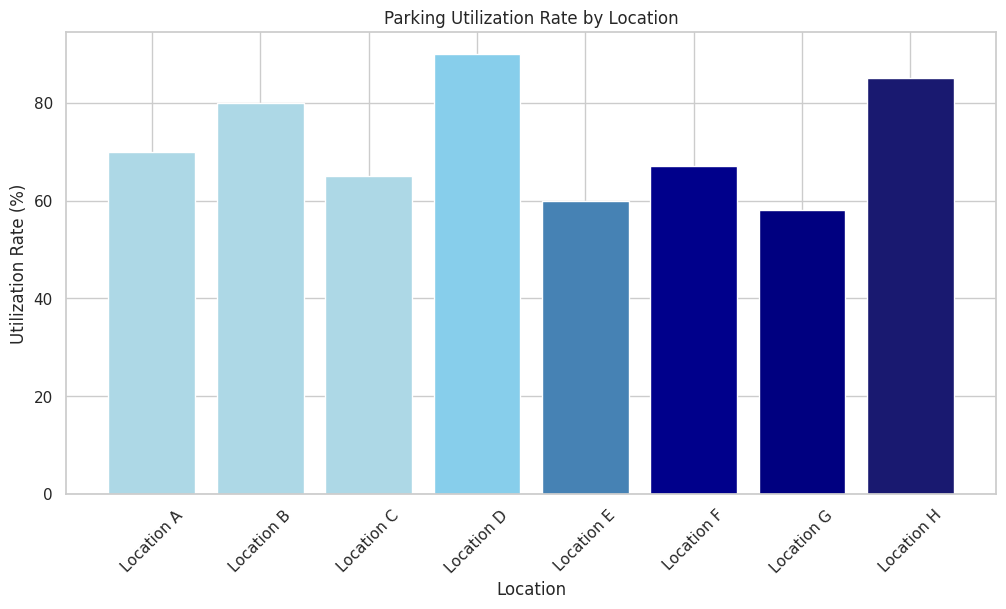

In [ ]:
import matplotlib.pyplot as plt

# Data for parking utilization rates at different locations
utilization_rates = {
    "Location A": 70,
    "Location B": 80,
    "Location C": 65,
    "Location D": 90,
    "Location E": 60,
    "Location F": 67,
    "Location G": 58,
    "Location H": 85
}

# Convert data to lists for plotting
locations = list(utilization_rates.keys())
rates = list(utilization_rates.values())

# Create bar plot with color gradient
colors = ['lightblue', 'lightblue', 'lightblue', 'skyblue', 'steelblue', 'darkblue', 'navy', 'midnightblue']
plt.figure(figsize=(12, 6))
plt.bar(locations, rates, color=colors)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Utilization Rate (%)')
plt.title('Parking Utilization Rate by Location')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()

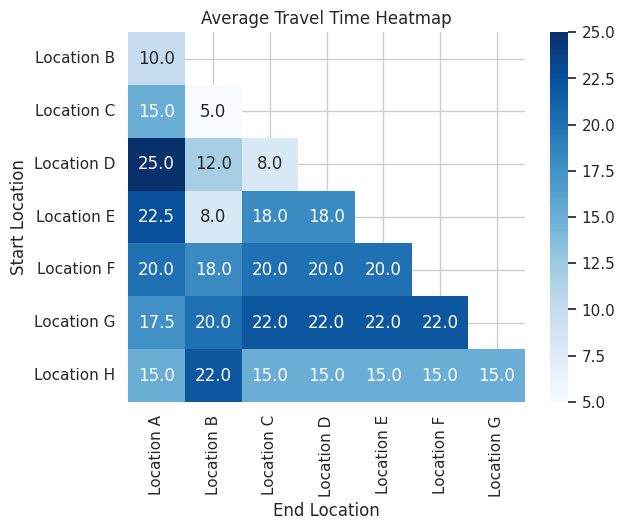

In [ ]:
  import seaborn as sns
  import matplotlib.pyplot as plt

  # Data for average travel times between locations
  travel_times = {
      "Location A": {
          "Location B": 10.0,
          "Location C": 15.0,
          "Location D": 25.0,
          "Location E": 22.5,
          "Location F": 20.0,
          "Location G": 17.5,
          "Location H": 15.0
      },
      "Location B": {
          "Location C": 5.0,
          "Location D": 12.0,
          "Location E": 8.0,
          "Location F": 18.0,
          "Location G": 20.0,
          "Location H": 22.0
      },
      "Location C": {
          "Location D": 8.0,
          "Location E": 18.0,
          "Location F": 20.0,
          "Location G": 22.0,
          "Location H": 15.0
      },
      "Location D": {
          "Location E": 18.0,
          "Location F": 20.0,
          "Location G": 22.0,
          "Location H": 15.0
      },
      "Location E": {
          "Location F": 20.0,
          "Location G": 22.0,
          "Location H": 15.0
      },
      "Location F": {
          "Location G": 22.0,
          "Location H": 15.0
      },
      "Location G": {
          "Location H": 15.0
      }
  }

  # Create a DataFrame from the travel time data
  df = pd.DataFrame(travel_times)

  # Create a heatmap using seaborn
  sns.heatmap(df, annot=True, cmap="Blues", fmt=".1f")

  # Set labels and title
  plt.xlabel("End Location")
  plt.ylabel("Start Location")
  plt.title("Average Travel Time Heatmap")

  # Show the plot
  plt.show()

In [ ]:
!pip install simpy
import networkx as nx
import matplotlib.pyplot as plt
import simpy

# Define classes for Vehicle, Road, and Intersection

def create_road_network():
    G = nx.Graph()
    # Add nodes and edges to represent roads
    return G

def simulate_traffic():
    env = simpy.Environment()
    # Create vehicles and schedule their movement
    simulation_time = 100  # Define simulation time
    env.run(until=simulation_time)

def visualize_traffic():
    # Use Matplotlib to create a visualization
    plt.show()

# Main function
if __name__ == "__main__":
    road_network = create_road_network()
    simulate_traffic()
    visualize_traffic()

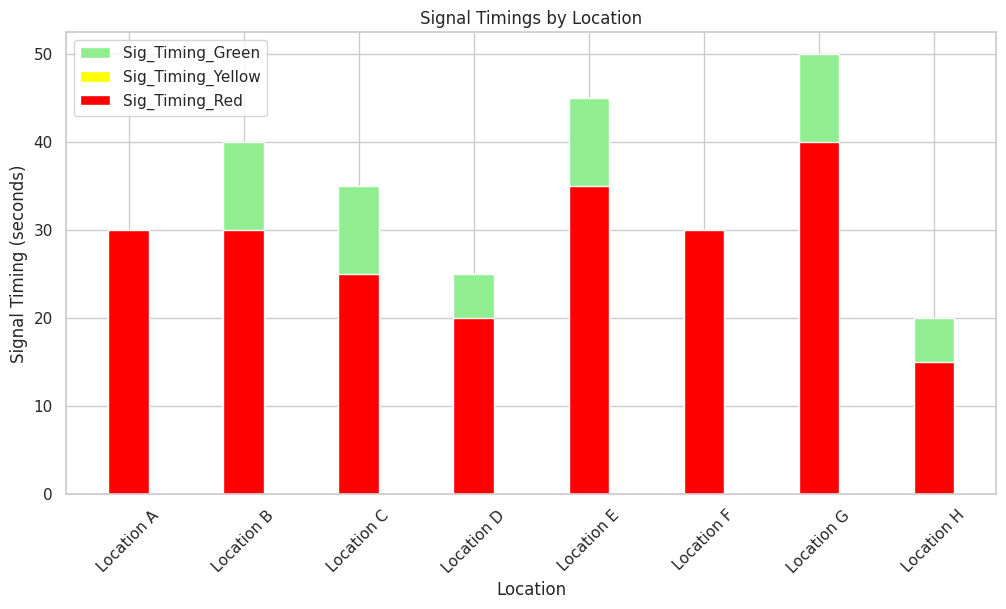

In [ ]:
import matplotlib.pyplot as plt

# Data for signal timings at different locations
signal_timings = {
    "Location A": {
        "Sig_Timing_Green": 30,
        "Sig_Timing_Yellow": 5,
        "Sig_Timing_Red": 30
    },
    "Location B": {
        "Sig_Timing_Green": 40,
        "Sig_Timing_Yellow": 5,
        "Sig_Timing_Red": 30
    },
    "Location C": {
        "Sig_Timing_Green": 35,
        "Sig_Timing_Yellow": 5,
        "Sig_Timing_Red": 25
    },
    "Location D": {
        "Sig_Timing_Green": 25,
        "Sig_Timing_Yellow": 5,
        "Sig_Timing_Red": 20
    },
    "Location E": {
        "Sig_Timing_Green": 45,
        "Sig_Timing_Yellow": 5,
        "Sig_Timing_Red": 35
    },
    "Location F": {
        "Sig_Timing_Green": 30,
        "Sig_Timing_Yellow": 5,
        "Sig_Timing_Red": 30
    },
    "Location G": {
        "Sig_Timing_Green": 50,
        "Sig_Timing_Yellow": 5,
        "Sig_Timing_Red": 40
    },
    "Location H": {
        "Sig_Timing_Green": 20,
        "Sig_Timing_Yellow": 5,
        "Sig_Timing_Red": 15
    }
}

# Convert data to lists for plotting
locations = list(signal_timings.keys())
green_times = [signal_timings[location]["Sig_Timing_Green"] for location in locations]
yellow_times = [signal_timings[location]["Sig_Timing_Yellow"] for location in locations]
red_times = [signal_timings[location]["Sig_Timing_Red"] for location in locations]

# Create grouped bar chart
plt.figure(figsize=(12, 6))
width = 0.35
plt.bar(locations, green_times, width, label="Sig_Timing_Green", color="lightgreen")
plt.bar(locations, yellow_times, width, label="Sig_Timing_Yellow", color="yellow")
plt.bar(locations, red_times, width, label="Sig_Timing_Red", color="red")

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Signal Timing (seconds)')
plt.title('Signal Timings by Location')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
import networkx as nx
import numpy as np
from sklearn.cluster import SpectralClustering

# ... (your existing code)

# Step 6: Improved Newman algorithm
# ... (Implement the improved Newman algorithm for community detection)
G = nx.Graph()  # Create a graph representing the road network
# ... (Add nodes and edges to the graph)

# Example: Adding nodes and edges (replace with your actual data)
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

communities = nx.algorithms.community.louvain_communities(G)

# Check if communities were found before creating the SpectralClustering object
if communities:
    # Step 7: Establishing a spectral clustering region definition model
    clustering = SpectralClustering(n_clusters=len(communities))
    labels = clustering.fit_predict(np.array(G.nodes()).reshape(-1, 1))
else:
    print("No communities found in the graph.")

# ... (rest of your code)
# Show the plot
plt.show()